<a href="https://colab.research.google.com/github/zain4cs/Data_Visualization/blob/main/Plotly_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/diamonds.csv")
print(df.shape)
df = df.sample(frac=0.1, random_state=10) # 10% of Data
print(df.shape)

(53940, 11)
(5394, 11)


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
8018,8019,1.01,Premium,E,SI1,61.7,56.0,4330,6.44,6.39,3.96
1583,1584,0.70,Very Good,D,VS1,60.4,58.0,3008,5.71,5.78,3.47
9138,9139,1.13,Very Good,H,SI2,59.8,59.0,4537,6.75,6.82,4.06
2787,2788,0.76,Ideal,F,VS2,61.0,55.0,3257,5.89,5.92,3.60
52429,52430,0.70,Premium,I,VVS1,61.2,59.0,2513,5.65,5.69,3.47


In [5]:
df.reset_index(drop=True, inplace=True)

In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,8019,1.01,Premium,E,SI1,61.7,56.0,4330,6.44,6.39,3.96
1,1584,0.70,Very Good,D,VS1,60.4,58.0,3008,5.71,5.78,3.47
2,9139,1.13,Very Good,H,SI2,59.8,59.0,4537,6.75,6.82,4.06
3,2788,0.76,Ideal,F,VS2,61.0,55.0,3257,5.89,5.92,3.60
4,52430,0.70,Premium,I,VVS1,61.2,59.0,2513,5.65,5.69,3.47


In [7]:
fig = px.scatter(df, x='carat', y='price', color='cut') # if use sns then write hue='cut'. Plotly use color='cut'
fig.show()

In [8]:
fig = px.scatter(df, x='carat', y='price', color='cut',
                 title='Diamond Price vs Carat',
                 labels ={'carat': 'Carat Weight', 'price': 'Price ($)'}
                 )
fig.show()

In [9]:
fig = px.line(df, x='carat', y='price',
                 title='Diamond Price vs Carat',
                 labels ={'carat': 'Carat Weight', 'price': 'Price ($)'}
                 )
fig.show()

In [10]:
df_mean = df.groupby('carat')['price'].mean().reset_index()
fig = px.line(df_mean, x='carat', y='price',
              title='Mean Price By Carat'
              )
fig.show()

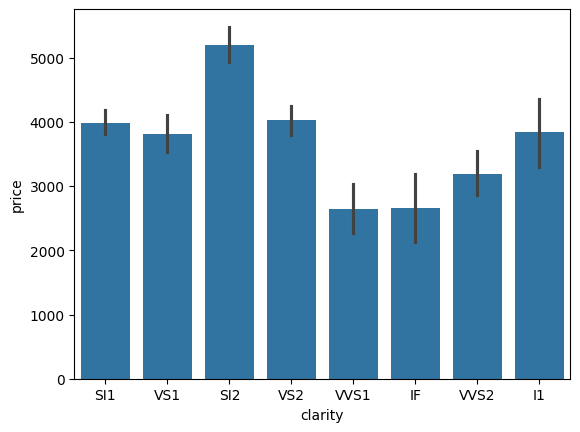

In [11]:
sns.barplot(x='clarity', y='price', data=df)
plt.show()

In [12]:
fig = px.bar(df, x='cut', y='price', color='cut')
fig.show()

**Apply Aggregation Function**

In [13]:
df_stats = df.groupby('cut')['price'].agg(['mean','std']).reset_index()
df_stats.head()

fig = px.bar(df_stats, x='cut', y='mean', error_y='std',
             title='Average Price by Cut',
             color='cut'
             )
fig.show()

In [14]:
# Histogram
fig = px.histogram(df, x='price', nbins=90, title='Price Distribution')
fig.show()

In [15]:
# Histogram
fig = px.histogram(df, x='price', nbins=90, title='Price Distribution', color='cut')
fig.show()

In [16]:
# Density Plot
fig = px.density_contour(df, x='carat', y='price',
                         title='Diamond Price vs Carat'
                         )
fig.show()

In [17]:
fig = px.box(df, x='cut', y='price')
fig.show()

In [18]:
fig = px.box(df, x='cut', y='price', color='cut',
            #  Outliers
             points= 'all',  # outlier, suspectedoutliers, all
             labels={'price': 'Price ($)', 'cut': 'CUT', 'clarity': 'Clarity'}
             )
fig.show()

In [19]:
# Violin Plot
fig = px.violin(df, x='cut', y='price', color='cut')
fig.show()

**# Facet Scatter plot**

In [20]:
fig = px.scatter(df, x='carat', y='price',
                 color='cut',
                 facet_col='clarity',
                 size='price',
                 animation_frame='cut',
                 title='Diamond Price vs Carat by cut and clarity'
                 )
fig.show()

In [21]:
fig = px.density_heatmap(df, x='carat', y='price',
                         title='Carat Vs Price',

                         )
fig.show()

**Subplots**

In [22]:
from plotly.subplots import make_subplots

# create subplot
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Carate Vs Price', 'Density Heatmap of Caratx   Vs Pirce'))

# Scatter Plot Carate Vs Price
scatter = px.scatter(df, x='carat', y ='price').data[0]
fig.add_trace(scatter, row=1, col=1)

# Density Heatmap of Caratx   Vs Pirce

heatmap = px.density_heatmap(df, x='carat', y='price').data[0]
fig.add_trace(heatmap, row=1, col=2)

fig.update_layout(title_text='Carat Vs Price & Density Heatmap of Carat Vs Price')
fig.show()

In [23]:
# Craete Heatmap of correlation matrix only Numeric columns

corr  = df[['carat', 'depth', 'table', 'price','x','y','z']].corr()
# fig = px.density_heatmap(corr, text_auto=True)

fig = go.Figure(data=go.Heatmap(x=corr.index.values, y=corr.columns.values, z=corr.values, colorscale='Picnic'))
fig.show()

__________________________________

**3D Plots**

In [24]:
fig = px.scatter_3d(df, x='carat', y='depth', z='price',
                    color='cut',
                    title='3D scatter plot carat, depth and price'
                    )
fig.show()

In [25]:
fig = px.scatter_3d(df, x='carat', y='depth', z='cut',
                    color='price',
                    title='3D scatter plot carat, depth and price'
                    )
fig.show()

In [26]:
fig = px.scatter(df,
                 x='carat',
                 y='price',
                size='price',
                 color='cut',
                title='Bubble chart'
                 )
fig.show()

In [27]:
df_sorted = df.sort_values(by='carat')
fig= px.area(df_sorted,
             x='carat',
             y='price',
             color='cut',
             title='Cumulative Price by Carat'
             )
fig.show()

In [28]:
# Pie Chart
fig = px.pie(df, names='clarity',
             color_discrete_sequence= px.colors.sequential.RdBu,
             title='Pie Chart')
fig.show()

In [29]:
fig = px.treemap(df, path=['cut','clarity','color'],
                 values ='price',
                 title='Doimand Price By Cut and clarity'
                 )
fig.show()

Parallel Corrdinates Plot

In [30]:
fig = px.parallel_coordinates(df, color='price',
                              title='Parallel Corrdinates Plots',
                              dimensions=['carat', 'depth','table','price']
                              )
fig.show()

Scatter Matrix fir carat, depth , table and  price

In [31]:
fig = px.scatter_matrix(df, dimensions = ['carat', 'depth','table','price'], color='cut') # Correlation B/W Columns
fig.show()

__________________________________

**Gantt Chart of random time series date from  2024-01-01 to 2024-01-08**

In [32]:
df_gantt = pd.DataFrame({
    'task': ['Groceries', 'shopping', 'school', 'travel'],
    'start': pd.to_datetime(['2024-01-01','2024-01-03','2024-01-05','2024-01-04']),
    'finish': pd.to_datetime(['2024-01-03','2024-01-06','2024-01-05','2024-01-08'])
})
df_gantt.head()

,task,start,finish
0,Groceries,2024-01-01,2024-01-03
1,shopping,2024-01-03,2024-01-06
2,school,2024-01-05,2024-01-05
3,travel,2024-01-04,2024-01-08


In [33]:
fig = px.timeline(df_gantt,
                  x_start='start',
                  x_end='finish',
                  y='task',
                  title='Gantt Chart'
                  )
fig.show()

___________________________________________

In [34]:
fig = px.strip(df, x='cut', y='price',
              #  color='clarity',
               hover_data = ['carat']
               )
fig.update_traces(jitter=0.5, marker=dict(size=5))

fig.update_layout(title_font_size=20,
                  xaxis_title = 'Carat Size',
                  yaxis_title = 'Price ($)'
                  )


fig.show()

**SunBurst Chart**

In [35]:
fig = px.sunburst(df, path=['cut' ,'clarity','color'],
                  values='price',
                  title = 'Sun Burst Chart')
fig.show()

In [49]:
# import plotly.io as pio

# !pip: install -U kaleido

/bin/bash: line 1: pip:: command not found


In [48]:
fig = px.sunburst(df, path=['cut' ,'clarity','color'],
                  values='price',
                  title = 'Sun Burst Chart')



fig.write_html('Sunbrust_Chart.html')
# fig.show()